<a href="https://colab.research.google.com/github/asimthaha/Pytorch_fundamentals/blob/main/01_Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

In [97]:
import torch
from torch import nn # nn contains all of pytorches building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

## 1. Data Preparing and Loading

excel
images
videos
audios
DNA data
text

ML is a game of two parts:
1. data to numerical representation
2. build a modle to learn patterns in that numerical representation


In [98]:
# create known parameters
weight = 0.7
bias = 0.3

start = 0
end=1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10], len(X), len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### splitting the data into train and test set

In [99]:
train_split = int(0.8 * len(X))
train_split

40

In [100]:
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test  = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

### Visualizing data

In [101]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data= X_test,
                     test_labels=Y_test,
                     predictions = None):
  """
  plots training data, test data and compare predictions.
  """
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # are there predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # show the legends
  plt.legend(prop={"size":14});

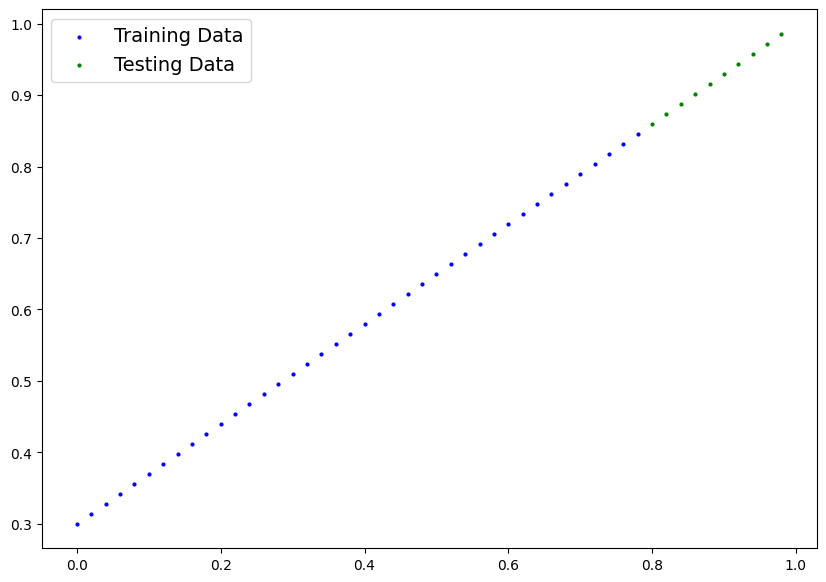

In [102]:
plot_predictions();

## 2. Building a model

What our model does:
* Start with random values (weight, bias)
* Look at training data and adjust hte random values to better represent(or get closer to) the ideal values(the weight & bias values we used to create the data)

How Does it do so:
* Through two main Algo:
* Gradient Descent
* Back Propagation



In [103]:
# create a linear regression model class
from torch import nn #(nn = neural networks)

class LinearRegressionModel(nn.Module):
  # pytorch inherits from nn.Module
  # Base class for all neural network modules
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # we start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # this parameter can be updated via gradient descent
                                            dtype = torch.float))
    self.bias= nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=float))

    # forward method to define computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # linear regression formula


* inherit the nn.Module class
* override the forward method

### pytorch model building essentials

* torch.nn - contains all of the buildings for computational graphs(neural network)
* torch..nn.Parameter - what parameter should our model try and learn
* torch.nn.Module - base class for all neural network modules(if we use it, override the forward() method)
* torch.optim - this is where the optimizer , helps in gradient descent
* def forward() - override this method

### checking the contents of our pytorch model

using .parameters()

In [104]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [105]:
torch.manual_seed(42)

model0 = LinearRegressionModel()

# checking the parameters
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [106]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

### Making predictions through torch.inference_mode()

In [107]:
with torch.inference_mode(): #turns off inference mode for gradient descent
  Y_pred = model0(X_test)

Y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

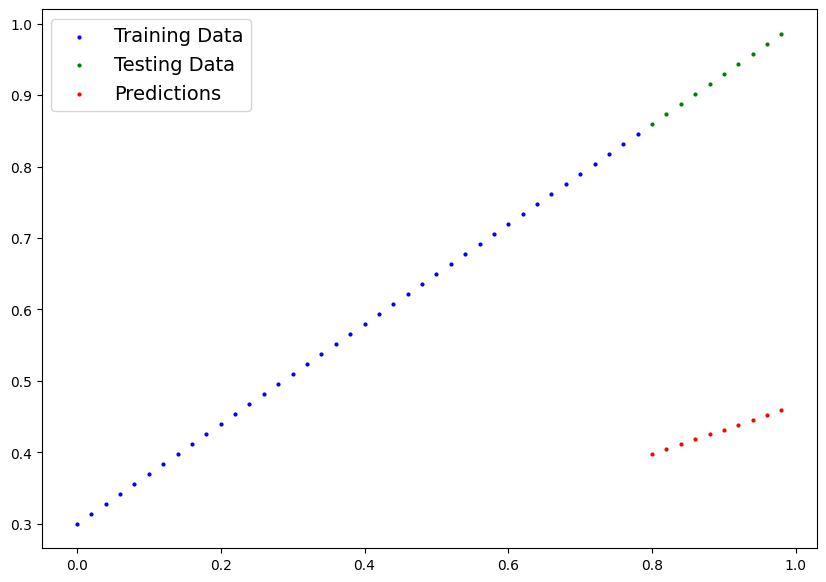

In [108]:
plot_predictions(predictions=Y_pred)

## Train the model

Loss Function

Optimizer -contains two atrributes:
* param - the paramter of a model you like to optimize
* lr - learning rate - defines how big or small the optimizer changes the parameters value with each step

MAE - Mean Absolute Error





In [109]:
 #MAE - Mean Absolute Error - nn.L1loss() equivalent in pytorch
 # setup  a loss function

loss_fn = nn.L1Loss()
loss_fn

 #setup an optimize
optimizer = torch.optim.SGD(
    params=model0.parameters(),
    lr=0.01) #lr = learning rate = possobly the most important hyper parameter you can set
#SGD - Stochastic Gradient Descent

### Building a Training loop

Training loop:
* Loop Thorught the data
* Forward pass(involves data moving through our models `forward()` functions) to make predictions on data - also called forward propagation
*  Calculate the loss (compare forward pass predictions to ground truth labels)
* Optimizer zero grad
* Loss backward - move backwards the network to calculate the gradients of each of the parameters ogf our model w.r.t the loss(**backpropagation**)
* Optimizer step - use the optimizer to adjust our models parameters to try  and improve the  (**Gradient Descent**)


In [110]:
torch.manual_seed(42)

# An epoch is one loop through the data..(this is a hyper paramter beacuse we set it ourselves)
epochs = 200
epoch_count=[]
loss_values = []
test_loss_values=[]

### Training
# 0. loop thorugh the data..
for epoch in range(epochs):
  # set the model to training mode - it sets all parameters that require gradients that require gradients
  model0.train()

  # 1. Forward Pass
  Y_pred = model0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(Y_pred, Y_train)
  # print(f"Loss: {loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss w.r.t the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop

  ### Testing
  model0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking
    # 1. Do the Forward Pass
    test_pred = model0(X_test)

    # 2. Claculate the loss
    test_loss = loss_fn(test_pred, Y_test)

  # print out whats happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")

    # print out model state_dict()
    print(model0.state_dict())


Epoch: 0 | Test: 0.3128813517678373 | Test loss: 0.4810651795382455
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388], dtype=torch.float64))])
Epoch: 10 | Test: 0.19767138632506426 | Test loss: 0.346355255078788
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388], dtype=torch.float64))])
Epoch: 20 | Test: 0.08908726094682914 | Test loss: 0.21729659528684148
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333], dtype=torch.float64))])
Epoch: 30 | Test: 0.05314853437903411 | Test loss: 0.14464020247411263
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768], dtype=torch.float64))])
Epoch: 40 | Test: 0.045437965798191725 | Test loss: 0.11360953504991064
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868], dtype=torch.float64))])
Epoch: 50 | Test: 0.04167863324115598 | Test loss: 0.09919951553296583
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843], dtype=torch.float64))])
Epoch: 60 | Te

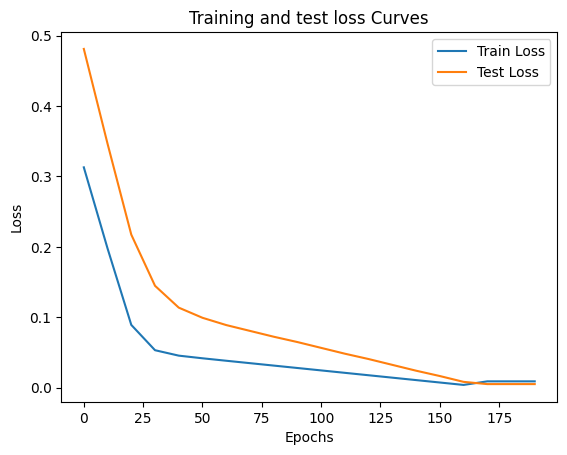

In [111]:
import numpy as np

# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()



In [112]:
with torch.inference_mode():
  Y_pred_new = model0(X_test)

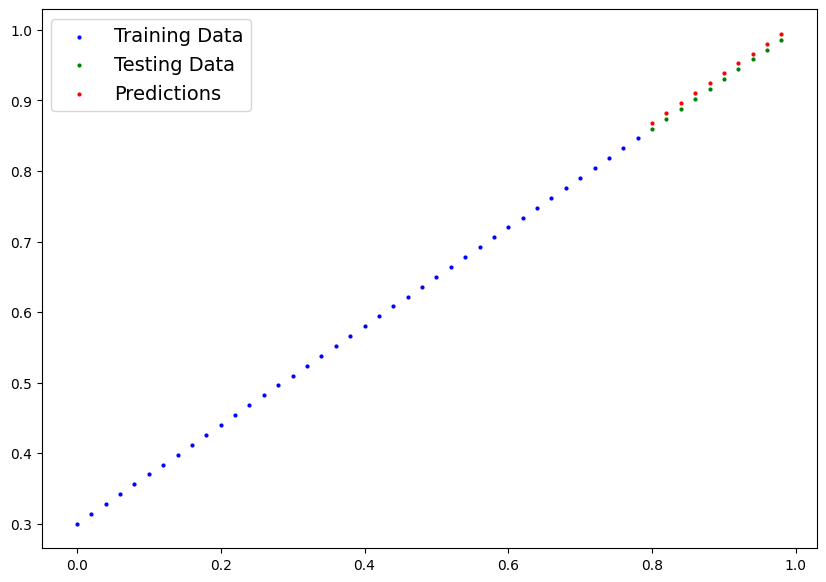

In [113]:
plot_predictions(predictions=Y_pred_new)

In [114]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6990])),
             ('bias', tensor([0.3093], dtype=torch.float64))])